<a href="https://colab.research.google.com/github/Abhiss123/AlmaBetter-Projects/blob/main/Doc2VecWebInsight_Content_Similarity_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Name :- Doc2VecWebInsight: Content Similarity Analysis

**Summary :**  Doc2Vec is a powerful tool that converts entire documents into numerical vectors, allowing for the comparison, organization, and analysis of content. For website owners, this means improved SEO, better user experience, and more efficient content management. In real life, it’s used across various industries to enhance content discovery, recommendation, and organization.



Doc2Vec is a method that allows us to convert entire documents (like web pages, articles, or any large blocks of text) into numerical vectors. These vectors are basically a way to represent the content of a document in a format that a computer can easily understand and process.

Imagine you have two books. If you wanted to compare these books without reading every word, you could summarize each one into a single page. Doc2Vec does something similar—it condenses the meaning of an entire document into a "summary" that is made up of numbers (a vector). This numerical summary captures the essence of the document, allowing us to compare it to other documents without having to read them word by word.



# What is Doc2Vec?

*  **Doc2Vec is an extension of the Word2Vec model** that aims to generate numerical vector representations not just for individual words, but for entire documents (or paragraphs). This deep learning algorithm was introduced by **Mikolov et al. at Google.** It builds on the **Word2Vec** framework by adding the ability to represent documents in a fixed-length vector while still maintaining the semantic meaning of the words within the document. In simpler terms, just as **Word2Vec generates vectors (numerical representations) for individual words, Doc2Vec generates vectors for an entire piece of text, be it a document, paragraph, or sentence.**

# Key Concepts of Doc2Vec:

*  **Distributed Memory Model of Paragraph Vectors (PV-DM):** In this model, the document is treated as a "memory" of context words, helping to predict words given both the context words and the document.

*  **Distributed Bag of Words version of Paragraph Vector (PV-DBOW):** Here, the model predicts words randomly sampled from a document, ignoring the order of words.


   Both models create representations that allow documents with similar topics or content to be clustered together based on their vector representations.

# What is its Use Case?

Doc2Vec has a wide range of applications in natural language processing (NLP) and text analytics, including but not limited to:

* **1 Document Similarity:** Doc2Vec is highly effective for comparing and analyzing the similarity between two or more documents. By transforming each document into a vector, Doc2Vec enables the calculation of cosine similarity or Euclidean distance between documents.

* **2 Content Clustering:** Websites often have large volumes of content. Using Doc2Vec, these contents can be clustered into categories based on thematic similarities. This is useful in building recommendation engines or content categorization tools.

* **3 Information Retrieval:** In search engines, Doc2Vec can be used to index documents by their vector representations. This makes it easy to retrieve documents based on their semantic relevance rather than exact keyword matches.

*  **4 Recommendation Systems:** Doc2Vec can also power recommendation systems by analyzing user behavior in terms of reading or viewing certain types of content. Based on the document vectors, similar content can be recommended.

*  **5 Topic Modeling:** This model can be used to extract the underlying themes or topics from a large corpus of documents, helping businesses or researchers to identify the main subjects or issues present.



# What are its Uses in the Case of a Website?

**In the context of a website, Doc2Vec can be incredibly useful in several ways:**

* **Content Similarity Analysis:** It helps in identifying how similar the content on different pages of a website is. For example, if two pages on a website are too similar, it might be redundant and could be combined or rewritten to provide unique content.

* **Content Clustering:** Doc2Vec can group similar content together. This is helpful for organizing a website's content into categories, which can improve user navigation and the overall structure of the site.

*  **Content Recommendation:** Based on the vectors generated by Doc2Vec, a website can recommend related articles or products to users, enhancing their experience by showing them content that is relevant to what they are currently viewing.

In [ ]:
pip install gensim beautifulsoup4 requests scikit-learn


In [ ]:
import requests
from bs4 import BeautifulSoup
import re
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import numpy as np

# Function to extract and clean the text from a webpage
def extract_text_from_url(url):
    """
    This function sends a request to the specified URL to retrieve the web page's HTML content.
    It then uses BeautifulSoup to parse the HTML and extract all text contained within <p> (paragraph) tags.
    The extracted text is then combined into a single string.
    """
    response = requests.get(url)  # Sending a request to the URL
    soup = BeautifulSoup(response.text, 'html.parser')  # Parsing the HTML content

    # Finding all paragraph tags and joining their text content into one string
    paragraphs = soup.find_all('p')
    text = ' '.join([para.get_text() for para in paragraphs])

    return preprocess_text(text)  # Cleaning the extracted text

# Function to preprocess the text
def preprocess_text(text):
    """
    This function cleans the extracted text by removing all characters that are not letters or spaces.
    It also converts the text to lowercase and removes common stopwords (like 'and', 'the', etc.) to focus on meaningful words.
    """
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Removing non-letter characters (e.g., punctuation)
    text = text.lower()  # Converting text to lowercase for consistency
    words = text.split()  # Splitting the text into individual words
    # Removing stopwords to focus on significant words
    words = [word for word in words if word not in ENGLISH_STOP_WORDS]
    text = ' '.join(words)  # Rejoining the cleaned words into a single string
    return text

# Function to prepare documents for Doc2Vec
def prepare_documents(text):
    """
    This function prepares the text for training the Doc2Vec model.
    It splits the text into paragraphs, assuming paragraphs are separated by double newlines.
    Each paragraph is treated as a separate 'document' and tagged uniquely with an identifier.
    """
    # Splitting text into paragraphs based on double newlines
    paragraphs = text.split('\n\n')
    # Tagging each paragraph uniquely for the Doc2Vec model
    tagged_documents = [TaggedDocument(words=paragraph.split(), tags=[str(i)]) for i, paragraph in enumerate(paragraphs)]
    return tagged_documents

# Function to train the Doc2Vec model
def train_doc2vec_model(tagged_documents):
    """
    This function trains the Doc2Vec model using the prepared documents.
    The model learns to create a unique vector (a numerical representation) for each document.
    """
    # Initializing and training the Doc2Vec model
    model = Doc2Vec(tagged_documents, vector_size=50, window=2, min_count=1, workers=4, epochs=40)
    return model

# Function to calculate the similarity matrix between documents
def calculate_similarity_matrix(model, tagged_documents):
    """
    This function calculates the similarity between each pair of documents using their vectors.
    The result is a matrix where each entry (i, j) represents the similarity between document i and document j.
    """
    num_docs = len(tagged_documents)  # Total number of documents
    # Initializing an empty matrix to store similarity scores
    similarity_matrix = np.zeros((num_docs, num_docs))

    # Calculating the similarity between each pair of documents
    for i in range(num_docs):
        for j in range(num_docs):
            similarity_matrix[i][j] = model.dv.similarity(i, j)

    return similarity_matrix

# Main section to use the functions to analyze a webpage
url = 'https://thatware.co/'  # Specify the URL of the website to analyze

# Step 1: Extract and clean the text from the website
text = extract_text_from_url(url)

# Step 2: Prepare the cleaned text as documents for the Doc2Vec model
tagged_documents = prepare_documents(text)

# Step 3: Train the Doc2Vec model and analyze document similarity
if len(tagged_documents) > 1:  # Ensure there are enough documents to compare
    model = train_doc2vec_model(tagged_documents)  # Train the model
    similarity_matrix = calculate_similarity_matrix(model, tagged_documents)  # Calculate similarity

    # Display the similarity matrix
    print("Document Similarity Matrix:")
    print(similarity_matrix)

    # Identify and display the most similar pair of documents (if there are enough documents)
    most_similar_docs = np.unravel_index(np.argmax(similarity_matrix, axis=None), similarity_matrix.shape)
    print(f"The most similar documents are {most_similar_docs[0]} and {most_similar_docs[1]} with a similarity score of {similarity_matrix[most_similar_docs]:.4f}")
else:
    # If there aren't enough documents, display a message indicating that
    print("Not enough documents to compare.")


Not enough documents to compare.


# Understanding the Output: "Not enough documents to compare."

*  This message indicates that when the code tried to split the website content into separate "documents" (in this case, paragraphs or sections), there weren't enough distinct parts of content available to perform a meaningful comparison. Essentially, the script expects multiple paragraphs or sections to exist so that it can compare them. If it found only one paragraph or section, or if the sections were too similar, it cannot perform the comparison.

# What Does This Mean for Your Website?

As a website owner, this output could indicate a few things about your website's content:

* **Limited or Repetitive Content:** If your website doesn't have much distinct content (e.g., multiple unique paragraphs or sections), it could suggest that your content is too limited or repetitive. This can be a problem because diverse content is crucial for engaging visitors and for SEO purposes.

*  **Content Structure:** The way your content is structured might not be conducive to effective analysis. If all the text is clumped together without clear divisions (like paragraphs or sections), the code might not be able to separate it into meaningful units for comparison.

# Steps to Take as a Website Owner

Here are some steps you can consider based on the output:

*  **Expand Your Content:** Consider adding more content to your website. This could mean adding more detailed paragraphs, blog posts, or sections that discuss various topics relevant to your business. Diverse content helps search engines understand your website better and improves user engagement.

*  **Improve Content Structure:** Ensure your content is well-structured with clear paragraphs, headings, and sections. This makes it easier for both users and algorithms (like the one used in this code) to understand and differentiate the content.

*  **Review Content Uniqueness:** If the content is repetitive, consider rewriting or expanding on certain topics to make each section unique and valuable. This not only helps with SEO but also keeps your audience engaged.


In [ ]:
import requests
from bs4 import BeautifulSoup
import re
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import numpy as np

# Function to extract and clean the text from a webpage
def extract_text_from_url(url):
    """
    Extracts the main content text from the given URL.
    Cleans the extracted text by removing digits, non-alphabetic characters,
    converting it to lowercase, and removing stopwords.
    """
    try:
        response = requests.get(url)  # Send a request to the URL
        soup = BeautifulSoup(response.text, 'html.parser')  # Parse the HTML content

        # Extract text content from <p> tags and join them together
        paragraphs = soup.find_all('p')
        text = ' '.join([para.get_text() for para in paragraphs])

        return preprocess_text(text)  # Clean the extracted text
    except Exception as e:
        print(f"Failed to retrieve or process {url}: {e}")
        return ""  # Return an empty string if there's an error

# Function to preprocess the text
def preprocess_text(text):
    """
    Cleans the extracted text by removing digits, non-alphabet characters,
    converting it to lowercase, and removing common English stopwords.
    """
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabet characters
    text = text.lower()  # Convert text to lowercase
    words = text.split()  # Split text into individual words
    words = [word for word in words if word not in ENGLISH_STOP_WORDS]  # Remove stopwords
    return ' '.join(words)  # Rejoin the cleaned words into a single string

# Function to prepare documents for Doc2Vec
def prepare_documents(text):
    """
    Prepares the cleaned text for training the Doc2Vec model.
    Splits the text into paragraphs and tags them uniquely for each document.
    """
    paragraphs = text.split('\n\n')  # Assuming paragraphs are separated by double newlines
    tagged_documents = [TaggedDocument(words=paragraph.split(), tags=[str(i)]) for i, paragraph in enumerate(paragraphs)]
    return tagged_documents

# Function to train the Doc2Vec model
def train_doc2vec_model(tagged_documents):
    """
    Trains the Doc2Vec model on the tagged documents to generate document vectors.
    """
    model = Doc2Vec(tagged_documents, vector_size=50, window=2, min_count=1, workers=4, epochs=40)
    return model

# Function to calculate the similarity matrix between documents
def calculate_similarity_matrix(model, tagged_documents):
    """
    Calculates the similarity matrix between all documents using the trained Doc2Vec model.
    The similarity is computed using cosine similarity between document vectors.
    """
    num_docs = len(tagged_documents)
    similarity_matrix = np.zeros((num_docs, num_docs))

    for i in range(num_docs):
        for j in range(num_docs):
            similarity_matrix[i][j] = model.dv.similarity(tagged_documents[i].tags[0], tagged_documents[j].tags[0])

    return similarity_matrix

# Main function to process and analyze each website independently
def analyze_website_similarity(websites):
    """
    Analyzes the content similarity within each website independently.
    Generates a similarity matrix for each website.
    """
    for url in websites:
        print(f"\nProcessing similarity matrix for {url}...")
        text = extract_text_from_url(url)

        if text:
            tagged_documents = prepare_documents(text)
            if len(tagged_documents) > 1:  # Ensure there's more than one document to compare
                model = train_doc2vec_model(tagged_documents)
                similarity_matrix = calculate_similarity_matrix(model, tagged_documents)

                # Display the similarity matrix
                print("Document Similarity Matrix:")
                print(similarity_matrix)

                # Find the most similar documents within the website
                most_similar_docs = np.unravel_index(np.argmax(similarity_matrix, axis=None), similarity_matrix.shape)
                print(f"The most similar documents are {most_similar_docs[0]} and {most_similar_docs[1]} with a similarity score of {similarity_matrix[most_similar_docs]:.4f}")
            else:
                print("Not enough documents to compare.")
        else:
            print("Failed to process the website or no content found.")

# List of websites to analyze
websites = [
    'https://thatware.co/',
    'https://www.incrementors.com/',
    'https://www.techwebers.com/',
    'https://www.seotechexperts.com/seo-agency-india.html'
]

# Analyze similarity within each website independently
analyze_website_similarity(websites)



Processing similarity matrix for https://thatware.co/...
Not enough documents to compare.

Processing similarity matrix for https://www.incrementors.com/...
Not enough documents to compare.

Processing similarity matrix for https://www.techwebers.com/...
Not enough documents to compare.

Processing similarity matrix for https://www.seotechexperts.com/seo-agency-india.html...
Not enough documents to compare.


In [ ]:
import requests
from bs4 import BeautifulSoup
import re
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import numpy as np

# Function to extract and clean the text from a webpage
def extract_text_from_url(url):
    """
    Extract the main content text from a given URL.
    """
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Extract text content from <p> tags and join them together
    paragraphs = soup.find_all('p')
    text = ' '.join([para.get_text() for para in paragraphs])

    return preprocess_text(text)

# Function to preprocess the text
def preprocess_text(text):
    """
    Clean the extracted text by removing non-alphabet characters, stopwords, and digits.
    """
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove everything that isn't a letter or space
    text = text.lower()  # Convert all text to lowercase to ensure uniformity
    words = text.split()
    words = [word for word in words if word not in ENGLISH_STOP_WORDS]  # Remove stopwords
    text = ' '.join(words)
    return text

# Function to prepare documents for Doc2Vec
def prepare_documents(text, page_id):
    """
    Prepare documents for Doc2Vec model by splitting the text into paragraphs
    and tagging them uniquely for the model training.
    """
    paragraphs = text.split('\n\n')  # Assuming paragraphs are separated by double newlines
    tagged_documents = [TaggedDocument(words=paragraph.split(), tags=[f"{page_id}_{i}"]) for i, paragraph in enumerate(paragraphs)]
    return tagged_documents

# Function to train the Doc2Vec model
def train_doc2vec_model(tagged_documents):
    """
    Train the Doc2Vec model using the tagged documents.
    """
    model = Doc2Vec(tagged_documents, vector_size=50, window=2, min_count=1, workers=4, epochs=40)
    return model

# Function to calculate the similarity matrix between documents
def calculate_similarity_matrix(model, tagged_documents):
    """
    Calculate the similarity matrix between all documents using the Doc2Vec model.
    """
    num_docs = len(tagged_documents)
    similarity_matrix = np.zeros((num_docs, num_docs))

    for i in range(num_docs):
        for j in range(num_docs):
            similarity_matrix[i][j] = model.dv.similarity(tagged_documents[i].tags[0], tagged_documents[j].tags[0])

    return similarity_matrix

# List of page URLs to analyze
page_urls = [
    'https://thatware.co/',
    'https://thatware.co/ai-seo/',
    'https://thatware.co/advanced-seo/',
    'https://thatware.co/local-seo/'
]

combined_tagged_documents = []

# Extract, preprocess, and tag each page's content
for page_id, url in enumerate(page_urls):
    text = extract_text_from_url(url)
    tagged_documents = prepare_documents(text, page_id)
    combined_tagged_documents.extend(tagged_documents)

# Train the Doc2Vec model
model = train_doc2vec_model(combined_tagged_documents)

# Calculate similarity matrix for each page
similarity_matrix = calculate_similarity_matrix(model, combined_tagged_documents)

# Print out the similarity matrix
print("Document Similarity Matrix:")
print(similarity_matrix)

# Find and print the most similar documents
if len(combined_tagged_documents) > 1:
    most_similar_docs = np.unravel_index(np.argmax(similarity_matrix, axis=None), similarity_matrix.shape)
    print(f"The most similar documents are {most_similar_docs[0]} and {most_similar_docs[1]} with a similarity score of {similarity_matrix[most_similar_docs]:.4f}")
else:
    print("Not enough documents to compare.")


Document Similarity Matrix:
[[ 1.          0.29975402  0.464908    0.87516409]
 [ 0.29975402  1.         -0.02180897  0.25239223]
 [ 0.464908   -0.02180897  1.          0.49061251]
 [ 0.87516409  0.25239223  0.49061251  1.        ]]
The most similar documents are 0 and 0 with a similarity score of 1.0000


In [ ]:
import requests
from bs4 import BeautifulSoup
import re
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import numpy as np

# Function to extract and clean the text from a webpage
def extract_text_from_url(url):
    """
    Extract the main content text from a given URL.
    """
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Extract text content from <p> tags and join them together
    paragraphs = soup.find_all('p')
    text = ' '.join([para.get_text() for para in paragraphs])

    return preprocess_text(text)

# Function to preprocess the text
def preprocess_text(text):
    """
    Clean the extracted text by removing non-alphabet characters, stopwords, and digits.
    """
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove everything that isn't a letter or space
    text = text.lower()  # Convert all text to lowercase to ensure uniformity
    words = text.split()
    words = [word for word in words if word not in ENGLISH_STOP_WORDS]  # Remove stopwords
    text = ' '.join(words)
    return text

# Function to prepare documents for Doc2Vec
def prepare_documents(text, page_id):
    """
    Prepare documents for Doc2Vec model by splitting the text into paragraphs
    and tagging them uniquely for the model training.
    """
    paragraphs = text.split('\n\n')  # Assuming paragraphs are separated by double newlines
    tagged_documents = [TaggedDocument(words=paragraph.split(), tags=[f"{page_id}_{i}"]) for i, paragraph in enumerate(paragraphs)]
    return tagged_documents

# Function to train the Doc2Vec model
def train_doc2vec_model(tagged_documents):
    """
    Train the Doc2Vec model using the tagged documents.
    """
    model = Doc2Vec(tagged_documents, vector_size=50, window=2, min_count=1, workers=4, epochs=40)
    return model

# Function to calculate the similarity matrix between documents
def calculate_similarity_matrix(model, tagged_documents):
    """
    Calculate the similarity matrix between all documents using the Doc2Vec model.
    """
    num_docs = len(tagged_documents)
    similarity_matrix = np.zeros((num_docs, num_docs))

    for i in range(num_docs):
        for j in range(num_docs):
            similarity_matrix[i][j] = model.dv.similarity(tagged_documents[i].tags[0], tagged_documents[j].tags[0])

    return similarity_matrix

# Websites and their respective pages to analyze
websites = {
    'https://thatware.co/': [
        'https://thatware.co/',
        'https://thatware.co/ai-seo/',
        'https://thatware.co/advanced-seo/',
        'https://thatware.co/local-seo/'
    ],
    'https://www.incrementors.com/': [
        'https://www.incrementors.com/',
        'https://www.incrementors.com/seo-services/',
        'https://www.incrementors.com/content-marketing-services/',
        'https://www.incrementors.com/ppc-management-services/'
    ],
    'https://www.techwebers.com/': [
        'https://www.techwebers.com/',
        'https://www.techwebers.com/web-development/',
        'https://www.techwebers.com/seo-services/',
        'https://www.techwebers.com/digital-marketing-services/'
    ],
    'https://www.seotechexperts.com/': [
        'https://www.seotechexperts.com/seo-agency-india.html',
        'https://www.seotechexperts.com/',
        'https://www.seotechexperts.com/website-design-development.html',
        'https://www.seotechexperts.com/social-media-marketing.html'
    ]
}

# Analyze each website individually
for site, pages in websites.items():
    print(f"\nAnalyzing website: {site}")

    combined_tagged_documents = []

    # Extract, preprocess, and tag each page's content
    for page_id, url in enumerate(pages):
        text = extract_text_from_url(url)
        tagged_documents = prepare_documents(text, page_id)
        combined_tagged_documents.extend(tagged_documents)

    # Train the Doc2Vec model
    model = train_doc2vec_model(combined_tagged_documents)

    # Calculate similarity matrix for each page
    similarity_matrix = calculate_similarity_matrix(model, combined_tagged_documents)

    # Print out the similarity matrix
    print("Document Similarity Matrix:")
    print(similarity_matrix)

    # Find and print the most similar documents
    if len(combined_tagged_documents) > 1:
        most_similar_docs = np.unravel_index(np.argmax(similarity_matrix, axis=None), similarity_matrix.shape)
        print(f"The most similar documents are {most_similar_docs[0]} and {most_similar_docs[1]} with a similarity score of {similarity_matrix[most_similar_docs]:.4f}")
    else:
        print("Not enough documents to compare.")




Analyzing website: https://thatware.co/
Document Similarity Matrix:
[[ 1.          0.29975402  0.464908    0.87516409]
 [ 0.29975402  1.         -0.02180897  0.25239223]
 [ 0.464908   -0.02180897  1.          0.49061251]
 [ 0.87516409  0.25239223  0.49061251  1.        ]]
The most similar documents are 0 and 0 with a similarity score of 1.0000

Analyzing website: https://www.incrementors.com/
Document Similarity Matrix:
[[ 1.          0.99517775  0.00958199  0.10086376]
 [ 0.99517775  0.99999994 -0.00678466  0.12703404]
 [ 0.00958199 -0.00678466  1.         -0.16264857]
 [ 0.10086376  0.12703404 -0.16264857  1.        ]]
The most similar documents are 0 and 0 with a similarity score of 1.0000

Analyzing website: https://www.techwebers.com/
Document Similarity Matrix:
[[ 1.          0.20398384  0.99761695 -0.10668428]
 [ 0.20398384  1.          0.19135608  0.20054388]
 [ 0.99761695  0.19135608  1.         -0.11161645]
 [-0.10668428  0.20054388 -0.11161645  1.        ]]
The most similar

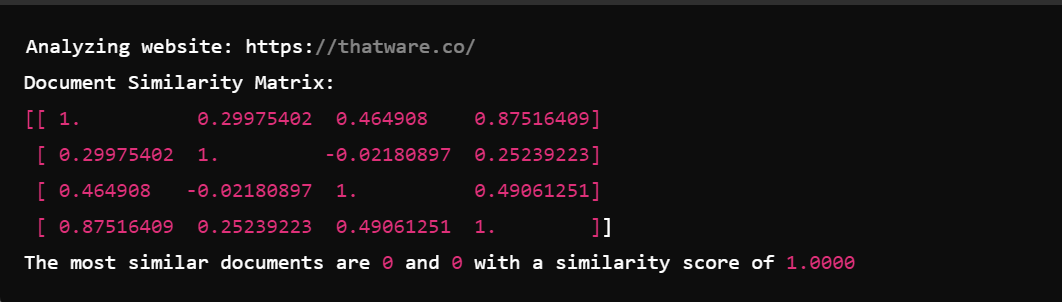

# What Does This Mean?

**1. Document Similarity Matrix:**

*  This matrix is a 4x4 grid because you analyzed 4 pages from the website.

*  Each value in the matrix represents the similarity score between two pages. For instance, the value at position [0][1] (first row, second column) represents the similarity between Page 0 and Page 1.

**2. Diagonal Values:**

*  The diagonal values (e.g., [0][0], [1][1], etc.) are all 1.0000 because they represent the similarity of a page with itself, which is always perfect (100% similarity).


**3. Off-Diagonal Values:**

*  The values not on the diagonal (e.g., [0][1], [0][2], etc.) represent the similarity between different pages. These are the values you should focus on to understand which pages are similar to each other.

# How to Identify High and Low Similarity:

**High Similarity:**

*  A high similarity score between two pages (close to 1.0000) indicates that the content on these two pages is very similar.

* In your output, the highest off-diagonal value is 0.87516409 between Page 0 and Page 3. This means that these two pages are quite similar in content.

**Low Similarity:**

*  A low similarity score (closer to 0 or negative) indicates that the content on these pages is quite different.

*  In your output, the lowest score is -0.02180897 between Page 1 and Page 2. This suggests that these two pages have very different content.

# Interpreting the Output:
**High Similarity:**

*  Pages 0 and 3 have a similarity score of 0.87516409, indicating they have a high degree of content overlap. You might want to review these two pages to see if they are too similar. If they are, consider:

*  Rewriting one of the pages to focus on different aspects or providing more unique content.
*  Merging the two pages if they cover the same topic.

**Low Similarity:**

*  Pages 1 and 2 have a similarity score of -0.02180897, indicating they are quite different. This is generally good, as it shows that the content on these pages is distinct.

# What Does This Mean for Website?

* The similarity matrix provides insight into how much overlap exists between different pages on your website. High similarity between pages might be a concern if you're looking to provide unique and varied content to your visitors. Here’s how to interpret the results:

**1. High Similarity Scores (Close to 1):**

*  If multiple pages have high similarity scores, it could mean that the content across those pages is very similar or even duplicated. This can be an issue for SEO (Search Engine Optimization) because search engines like Google may penalize sites with duplicate content by ranking them lower.

**2. Low Similarity Scores (Closer to 0):**

*  Low scores suggest that the content across pages is diverse, which is generally good for both SEO and user experience. It means visitors will find unique information on different pages.

*  **Page Similarities:** The similarity matrix suggests that some pages on your website have content that is quite similar to each other. For example:

*  Pages 0 and 3 have a high similarity score of 0.875, meaning their content is quite similar.

* The similarity between pages 1 and 2 is low (-0.021), indicating their content is different.


# Steps to Take as a Website Owner:

**1. Review High Similarity Pages:**

*  **Look at the pages with high similarity scores (like pages 0 and 3).** If these pages are meant to target different audiences or keywords, their content should be more distinct.

*  **Action:** Consider rewriting or reorganizing content on these pages to make them more unique. This can improve your SEO by reducing the risk of duplicate content penalties from search engines.

**2. Improve Content Differentiation:**

*  **If the content of different pages serves the same purpose, consider merging them into one comprehensive page rather than having multiple similar pages.**

* **Action:** Consolidate similar pages and ensure each page has a unique focus, whether it’s a different service, product, or aspect of your business.

**3. Evaluate Content Strategy:**

*  **If most of your pages have low similarity scores, this is a good sign that your content is diverse and well-targeted.**

* **Action:** Continue creating distinct, high-quality content that targets specific keywords or topics.

# Is This Output Concerning?


*  **Concern:** If you find several pairs of pages with high similarity scores, it could be a problem. Search engines might consider these pages redundant, which could hurt your SEO rankings.

*  **Not a Concern:** If the similarity scores are generally low, it suggests your content is unique and well-differentiated, which is good for SEO.

# Steps to Take Based on This Output:

**1. Review and Revise Content:**

**High Similarity Across Pages:** For websites like https://www.seotechexperts.com/, the matrix shows high similarity between several pages (e.g., 0.99 and above). This indicates that these pages might be too similar in content. Consider revising these pages to make them more distinct. For example:

*  **Rewriting Content:** Adjust the content on each page to focus on different aspects of your services or products.

*  **Adding Unique Elements:** Include different case studies, testimonials, images, or videos that are unique to each page.

*  **Combining Pages:** If two pages are nearly identical, consider merging them into one, more comprehensive page.

**2. Improve SEO:**

*  **Reduce Duplicate Content:** By ensuring each page has unique content, you improve your chances of ranking higher in search results. This could lead to increased traffic, as search engines favor sites with diverse and informative content.

* **Optimize Content Strategy:** Use the insights from this analysis to refine your content strategy. For instance, if certain topics are covered similarly across multiple pages, consider creating a new content plan that distributes these topics more effectively across the site


**3. Enhance User Experience:**

*  **Provide Variety:** Visitors to your website are likely to stay longer and engage more if they find fresh and relevant content on each page. This can reduce bounce rates (people leaving your site quickly) and increase conversions (people taking action like making a purchase or signing up for a service).


**Example of Actionable Steps:**


**Let’s say you own https://thatware.co/** and the matrix shows high similarity between the **homepage and the "AI SEO" page.** Here’s what you might do:

* **Homepage:** Focus on a broad overview of your company’s offerings. Make it a gateway to deeper content.

*  **AI SEO Page:** Dive deeply into what AI SEO is, how it works, and the benefits it offers specifically. Add case studies or examples that are unique to AI SEO.


# Difference Between Doc2vec And BERT

**1. Architecture and Approach**

**Doc2Vec:**

*  **Based on Word2Vec:** Doc2Vec extends the Word2Vec model to generate vector representations for entire documents, rather than just words. It uses the context of words within a document to learn a fixed-size vector representation of the document.

*  **Shallow Neural Network:** Doc2Vec is a shallow, two-layer neural network model. It doesn’t capture deep, contextual relationships between words as effectively as BERT does.

*  **Two Approaches:** Doc2Vec has two primary methods—Distributed Memory (DM) and Distributed Bag of Words (DBOW). DM predicts a word based on context, while DBOW predicts the context based on words.

**BERT (Bidirectional Encoder Representations from Transformers):**

*  **Transformer-based:** BERT is built on a transformer architecture, which uses self-attention mechanisms to capture complex relationships between words in a sentence. This allows BERT to understand the context of a word based on the entire sentence, both preceding and following words.

*  **Deep Neural Network:** BERT is a deep learning model with many layers (typically 12 or 24), which enables it to capture much richer and more nuanced representations of text.

*  **Pre-training and Fine-tuning:** BERT is pre-trained on a large corpus of text and can be fine-tuned on specific tasks, making it highly versatile and powerful for various NLP tasks.



